In [1]:
from __future__ import print_function
import os.path
import dalmatian as dm
import pandas as pd
import sys
sys.path.insert(0, '../ccle_processing/')
import CCLE_postp_function as ccle
sys.path.insert(0, '../JKBio/')
import Datanalytics as da 
import TerraFunction as terra
%load_ext autoreload
from Helper import *
%autoreload 2
#%load_ext rpy2.ipython
from taigapy import TaigaClient
tc = TaigaClient()
from wand.image import Image as WImage
import numpy as np
from bokeh.plotting import *
from bokeh.models import HoverTool
output_notebook()
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.manifold import MDS, TSNE

Loading BokehJS ...

In [2]:
# biggest change genes across time point
# GSEA
counts = pd.read_csv("data/expression.MAX_AMLproject.counts.tsv", sep='\t')
# tpm = pd.read_csv("data/expression.MAX_AMLproject.tpm.tsv", sep='\t')
#transcripts = pd.read_csv("data/expression.MAX_AMLproject.transcripts.tsv", sep='\t')b

In [3]:
counts.shape

(58813, 32)

In [4]:
# we have a number of non zero similar to nb of prot coding genes
np.count_nonzero(counts.values[:,2:])/30

19360.8

In [5]:
counts.columns

Index(['gene_id', 'transcript_id(s)', '0h-A-RNA', '0h-B-RNA', '0h-C-RNA',
       '1A-24h-RNA', '1A-8h-RNA', '1B-24h-RNA', '1B-8h-RNA', '1C-24h-RNA',
       '1C-8h-RNA', '2A-16h-RNA', '2A-24h-RNA', '2A-2h-RNA', '2A-4h-RNA',
       '2A-8h-RNA', '2B-16h-RNA', '2B-24h-RNA', '2B-2h-RNA', '2B-4h-RNA',
       '2B-8h-RNA', '2C-16h-RNA', '2C-24h-RNA', '2C-2h-RNA', '2C-4h-RNA',
       '2C-8h-RNA', '3A-8h-RNA', '3B-8h-RNA', '3C-8h-RNA', '4A-8h-RNA',
       '4B-8h-RNA', '4C-8h-RNA'],
      dtype='object')

In [6]:
filtered = filterProteinCoding(listofgenes = counts['gene_id'].values, idtype = "ensembl_gene_id")
len(filtered)

21412


19162

In [7]:
counts = counts.iloc[filtered]

In [8]:
#filter some more
toremove = np.argwhere(counts[counts.columns.values[2:]].values.var(1)==0)
toremove.ravel()

array([    1,    15,    23, ..., 19155, 19159, 19161])

In [9]:
counts = counts.drop(counts.index[toremove.ravel()],0)
counts = counts.reset_index()
counts = counts.drop(columns='index')

In [10]:
counts

,gene_id,transcript_id(s),0h-A-RNA,0h-B-RNA,0h-C-RNA,1A-24h-RNA,1A-8h-RNA,1B-24h-RNA,1B-8h-RNA,1C-24h-RNA,...,2C-24h-RNA,2C-2h-RNA,2C-4h-RNA,2C-8h-RNA,3A-8h-RNA,3B-8h-RNA,3C-8h-RNA,4A-8h-RNA,4B-8h-RNA,4C-8h-RNA
0,ENSG00000000003.14,"ENST00000373020.8,ENST00000494424.1,ENST000004...",0.00,1.00,1.00,0.00,3.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,ENSG00000000419.12,"ENST00000371582.8,ENST00000371584.8,ENST000003...",319.00,257.00,338.00,261.00,246.00,259.00,352.00,169.00,...,308.00,287.00,441.00,335.00,356.00,306.00,416.00,386.00,404.00,390.00
2,ENSG00000000457.13,"ENST00000367770.5,ENST00000367771.10,ENST00000...",97.37,79.53,88.76,99.19,113.70,96.48,126.73,43.64,...,133.01,112.16,151.30,112.12,133.27,126.75,145.26,148.45,154.96,148.52
3,ENSG00000000460.16,"ENST00000286031.10,ENST00000359326.8,ENST00000...",191.63,144.47,200.24,136.81,160.30,160.52,209.27,82.36,...,155.99,125.84,131.70,143.88,117.73,111.25,136.74,90.55,121.04,117.48
4,ENSG00000000938.12,"ENST00000374003.7,ENST00000374004.5,ENST000003...",476.00,430.00,497.00,478.00,235.00,535.00,234.00,263.00,...,614.00,347.00,330.00,254.00,90.00,84.00,90.00,83.00,68.00,99.00
5,ENSG00000000971.15,"ENST00000359637.2,ENST00000367429.8,ENST000004...",1.00,3.00,1.00,6.00,2.00,8.00,1.00,6.00,...,8.00,1.00,4.00,2.00,2.00,2.00,1.00,4.00,2.00,4.00
6,ENSG00000001036.13,"ENST00000002165.10,ENST00000367585.1,ENST00000...",576.93,503.71,660.68,679.60,504.90,740.72,644.69,353.90,...,789.64,472.90,620.81,512.72,381.87,359.78,408.62,400.80,431.53,455.52
7,ENSG00000001084.12,"ENST00000229416.10,ENST00000504353.1,ENST00000...",61.00,77.00,94.00,76.00,96.00,89.00,172.00,50.00,...,108.00,113.00,132.00,156.00,177.00,176.00,214.00,232.00,263.00,216.00
8,ENSG00000001167.14,"ENST00000341376.10,ENST00000353205.5",434.00,436.00,524.00,472.00,582.00,534.00,658.00,287.00,...,588.00,346.00,367.00,553.00,943.00,846.00,1065.00,864.00,971.00,937.00
9,ENSG00000001460.17,"ENST00000003583.12,ENST00000337248.8,ENST00000...",23.00,24.00,20.00,24.00,23.00,51.00,29.00,34.00,...,31.00,26.00,27.00,28.00,4.00,11.00,7.00,2.00,5.00,6.00


In [11]:
# renormalize the data
data = counts[counts.columns.values[2:]].values
data = np.log2(1+ (1000000 * (data / data.max(0))))

In [12]:
np.count_nonzero(counts.values[:,2:])/30

13713.666666666666

In [13]:
counts = pd.DataFrame(data.T,columns=counts['gene_id'],index=counts.columns.values[2:])

In [37]:
DMSO = '1'
MS2 = '2'
JQ1 = '3'
MS2_JQ1 = '4'
replicate = '0'

In [32]:
counts

gene_id,ENSG00000000003.14,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,ENSG00000001460.17,...,ENSG00000284733.1,ENSG00000284753.1,ENSG00000284770.1,ENSG00000285077.1,type,DMSO,MS2,JQ1,MS2_JQ1,replicate
0h-A-RNA,0.000000,11.517227,9.806339,10.782321,12.094469,3.348412,12.371846,9.132632,11.961235,7.729696,...,2.483528,11.765676,12.018188,5.702383,0,False,False,False,False,True
0h-B-RNA,3.584586,11.465155,9.774096,10.634554,12.207518,5.087064,12.435730,9.727510,12.227506,8.049439,...,0.000000,11.648652,12.077373,6.943279,0,False,False,False,False,True
0h-C-RNA,3.340907,11.592344,9.664614,10.837372,12.148417,3.340907,12.559044,9.747266,12.224722,7.520803,...,2.004932,11.726465,11.949419,6.491048,0,False,False,False,False,True
1A-24h-RNA,0.000000,10.946970,9.552379,10.015757,11.819599,5.534757,12.327156,9.168770,11.801380,7.511225,...,3.097564,10.195037,11.528776,6.925733,1,True,False,False,False,False
1A-8h-RNA,4.868066,11.175975,10.063274,10.558424,11.110007,4.307596,12.212995,9.819397,12.417976,7.763056,...,2.036461,10.461236,11.528176,6.713925,1,True,False,False,False,False
1B-24h-RNA,0.000000,10.880490,9.457128,10.190760,11.926682,5.887495,12.395968,9.340876,11.923983,8.539225,...,0.000000,10.246858,11.631787,6.431856,1,True,False,False,False,False
1B-8h-RNA,0.000000,11.400832,9.927962,10.650985,10.812034,3.117483,12.273619,10.368223,12.303096,7.805311,...,0.000000,10.627929,11.770558,7.503428,1,True,False,False,False,False
1C-24h-RNA,0.000000,10.506321,8.555867,9.470356,11.144006,5.717101,11.572121,8.751656,11.269940,8.196837,...,0.000000,9.081186,11.381533,7.014824,1,True,False,False,False,False
1C-8h-RNA,0.000000,11.660377,10.009981,10.222142,11.108044,5.725526,12.183602,10.125556,12.184809,7.369713,...,0.000000,10.578403,11.578421,5.694527,1,True,False,False,False,False
2A-16h-RNA,0.000000,10.496239,9.438427,9.704791,11.599656,6.766053,11.818363,9.683409,11.692977,8.378566,...,0.000000,9.446683,11.566973,6.358347,2,False,True,False,False,False


In [16]:
counts['type'] = [val[0] for val in counts.index.values]

In [17]:
counts['DMSO'] = [val[0]==DMSO for val in counts.index.values]
counts['MS2'] = [val[0]==MS2 for val in counts.index.values]
counts['JQ1'] = [val[0]==JQ1 for val in counts.index.values]
counts['MS2_JQ1'] = [val[0]==MS2_JQ1 for val in counts.index.values]
counts['replicate'] = [val[0]==replicate for val in counts.index.values]

In [38]:
replicate = counts.loc[[val for val in counts.index if replicate == val[0]]]
DMSO = pd.concat([replicate, counts.loc[[val for val in counts.index if DMSO == val[0]]]])
MS2 = pd.concat([replicate, counts.loc[[val for val in counts.index if MS2 == val[0]]]])
JQ1 = pd.concat([replicate, counts.loc[[val for val in counts.index if JQ1 == val[0]]]])
MS2_JQ1 = pd.concat([replicate, counts.loc[[val for val in counts.index if MS2_JQ1 == val[0]]]])

## some plotting

In [117]:
scatter(MDS(2).fit_transform(counts.values[:,:-6]), counts.index.values, counts['type'].values)

In [134]:
scatter(TSNE(2,10).fit_transform(counts.values[:,:-6]), counts.index.values, counts['type'].values)

# lets look at the similarity accross replicates

we have some outliers, else it seems to make some sense and on average, to be extremelly similar!

In [85]:
MS2repA = MS2.loc[[val for val in MS2.index if 'A' in val[:-4]]][MS2.columns.values[:-6]]
MS2repB = MS2.loc[[val for val in MS2.index if 'B' in val[:-4]]][MS2.columns.values[:-6]]
MS2repC = MS2.loc[[val for val in MS2.index if 'C' in val[:-4]]][MS2.columns.values[:-6]]

In [86]:
MS2repA

gene_id,ENSG00000000003.14,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,ENSG00000001460.17,...,ENSG00000283787.1,ENSG00000283980.1,ENSG00000284308.1,ENSG00000284491.2,ENSG00000284662.1,ENSG00000284723.1,ENSG00000284733.1,ENSG00000284753.1,ENSG00000284770.1,ENSG00000285077.1
0h-A-RNA,0.0,11.517227,9.806339,10.782321,12.094469,3.348412,12.371846,9.132632,11.961235,7.729696,...,7.295994,0.000000,8.757248,0.000000,2.483528,0.0,2.483528,11.765676,12.018188,5.702383
2A-16h-RNA,0.0,10.496239,9.438427,9.704791,11.599656,6.766053,11.818363,9.683409,11.692977,8.378566,...,7.644487,3.216503,9.236588,10.100408,0.000000,0.0,0.000000,9.446683,11.566973,6.358347
2A-24h-RNA,0.0,10.957432,9.499967,9.945309,11.735863,6.735840,12.338251,9.364888,11.829931,7.549391,...,6.894880,2.850158,8.521353,7.090336,0.000000,0.0,0.000000,10.559715,11.538482,5.319823
2A-2h-RNA,0.0,11.301160,10.152977,10.282212,11.619955,3.291145,12.243536,9.995076,11.643927,7.999311,...,7.948887,3.291145,9.399162,0.000000,0.000000,0.0,0.000000,11.320575,11.958137,6.068079
2A-4h-RNA,0.0,11.673961,10.025727,10.054667,11.061855,0.000000,12.172345,10.204423,11.641056,7.740476,...,6.508638,0.000000,9.129033,6.940372,0.000000,0.0,0.000000,10.726846,11.795497,6.692303
2A-8h-RNA,0.0,11.074177,9.758767,10.127477,11.055630,2.979139,11.988122,10.227636,12.161015,7.834219,...,7.377156,2.979139,9.178299,0.000000,0.000000,0.0,0.000000,10.122762,11.656088,6.051810


In [87]:
# reordering
MS2repA = MS2repA.loc[MS2repA.index.values[[0,3,4,5,1,2]]]
MS2repB = MS2repB.loc[MS2repB.index.values[[0,3,4,5,1,2]]]
MS2repC = MS2repC.loc[MS2repC.index.values[[0,3,4,5,1,2]]]

In [88]:
MS2repA.mean(1)

0h-A-RNA      8.373080
2A-2h-RNA     8.350478
2A-4h-RNA     8.240342
2A-8h-RNA     8.269936
2A-16h-RNA    8.047045
2A-24h-RNA    8.042931
dtype: float64

In [89]:
MS2repB.mean(1)

0h-B-RNA      8.413558
2B-2h-RNA     8.334878
2B-4h-RNA     8.263597
2B-8h-RNA     8.083387
2B-16h-RNA    8.266399
2B-24h-RNA    8.027636
dtype: float64

In [90]:
MS2repC.mean(1)

0h-C-RNA      8.445489
2C-2h-RNA     8.375029
2C-4h-RNA     8.123350
2C-8h-RNA     8.217883
2C-16h-RNA    8.197522
2C-24h-RNA    8.097067
dtype: float64

In [91]:
mostvargenesA = np.argsort(MS2repA.var(0).values)
mostvargenesB = np.argsort(MS2repB.var(0).values)
mostvargenesC = np.argsort(MS2repC.var(0).values)

In [92]:
mostvargenesC

array([ 6520,  8902,  5239, ...,  8452, 15639, 12258])

Do we have a good overlap?
- we do only if we first remove the non prot coding genes...

In [93]:
commonvar = set(counts.columns.values[mostvargenesA[:2000]].tolist()) & set(counts.columns.values[mostvargenesB[:2000]].tolist()) & set(counts.columns.values[mostvargenesC[:2000]].tolist())
len(commonvar)

539

In [85]:
commonvar

{8192,
 12289,
 4099,
 12292,
 10246,
 12296,
 8201,
 4108,
 4112,
 4113,
 10259,
 12317,
 8229,
 10280,
 6184,
 4138,
 8235,
 10283,
 10285,
 8238,
 4139,
 12334,
 8241,
 12338,
 12340,
 8245,
 6202,
 10303,
 6208,
 10305,
 10307,
 12356,
 8267,
 8271,
 10321,
 8276,
 4180,
 10326,
 4182,
 6230,
 12377,
 6231,
 12379,
 8284,
 4187,
 12381,
 4190,
 6233,
 12385,
 10338,
 12387,
 10346,
 12395,
 8300,
 8302,
 12398,
 4206,
 8305,
 12402,
 10356,
 12405,
 12406,
 6262,
 10360,
 10363,
 6269,
 12419,
 10373,
 4230,
 8329,
 8330,
 12427,
 6285,
 4238,
 8335,
 12432,
 8337,
 4241,
 6289,
 10388,
 4254,
 8353,
 12450,
 8355,
 6309,
 4262,
 10407,
 12455,
 6313,
 8367,
 6141,
 12467,
 4275,
 12473,
 12474,
 12475,
 12479,
 10432,
 10433,
 10435,
 12484,
 10444,
 12492,
 4305,
 8404,
 12501,
 4309,
 4313,
 8413,
 12509,
 6369,
 12514,
 8419,
 4324,
 6370,
 12518,
 6372,
 12520,
 10474,
 8428,
 12526,
 10479,
 10481,
 8434,
 12530,
 12534,
 6390,
 6392,
 6393,
 6396,
 12543,
 12545,
 6407,
 105

In [94]:
DMSO

gene_id,ENSG00000000003.14,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,ENSG00000001460.17,...,ENSG00000284733.1,ENSG00000284753.1,ENSG00000284770.1,ENSG00000285077.1,type,DMSO,MS2,JQ1,MS2_JQ1,replicate
0h-A-RNA,0.000000,11.517227,9.806339,10.782321,12.094469,3.348412,12.371846,9.132632,11.961235,7.729696,...,2.483528,11.765676,12.018188,5.702383,0,False,False,False,False,True
0h-B-RNA,3.584586,11.465155,9.774096,10.634554,12.207518,5.087064,12.435730,9.727510,12.227506,8.049439,...,0.000000,11.648652,12.077373,6.943279,0,False,False,False,False,True
0h-C-RNA,3.340907,11.592344,9.664614,10.837372,12.148417,3.340907,12.559044,9.747266,12.224722,7.520803,...,2.004932,11.726465,11.949419,6.491048,0,False,False,False,False,True
1A-8h-RNA,4.868066,11.175975,10.063274,10.558424,11.110007,4.307596,12.212995,9.819397,12.417976,7.763056,...,2.036461,10.461236,11.528176,6.713925,1,True,False,False,False,False
1B-8h-RNA,0.000000,11.400832,9.927962,10.650985,10.812034,3.117483,12.273619,10.368223,12.303096,7.805311,...,0.000000,10.627929,11.770558,7.503428,1,True,False,False,False,False
1C-8h-RNA,0.000000,11.660377,10.009981,10.222142,11.108044,5.725526,12.183602,10.125556,12.184809,7.369713,...,0.000000,10.578403,11.578421,5.694527,1,True,False,False,False,False
1A-24h-RNA,0.000000,10.946970,9.552379,10.015757,11.819599,5.534757,12.327156,9.168770,11.801380,7.511225,...,3.097564,10.195037,11.528776,6.925733,1,True,False,False,False,False
1B-24h-RNA,0.000000,10.880490,9.457128,10.190760,11.926682,5.887495,12.395968,9.340876,11.923983,8.539225,...,0.000000,10.246858,11.631787,6.431856,1,True,False,False,False,False
1C-24h-RNA,0.000000,10.506321,8.555867,9.470356,11.144006,5.717101,11.572121,8.751656,11.269940,8.196837,...,0.000000,9.081186,11.381533,7.014824,1,True,False,False,False,False


In [95]:
DMSO = DMSO.loc[DMSO.index.values[[0,1,2,4,6,8,3,5,7]]][DMSO.columns.values[:-6]]

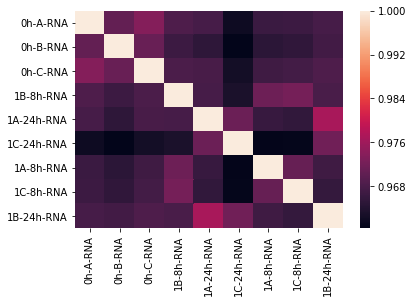

In [103]:
sns.heatmap(DMSO.T.corr(), 
            xticklabels=DMSO.index.values,
            yticklabels=DMSO.index.values)

In [99]:
MS2 = MS2.loc[MS2.index.values[[0,1,2,5,10,15,6,11,16,7,12,17,3,8,13,4,9,14]]][MS2.columns.values[:-6]]

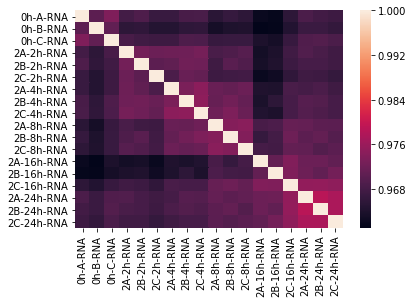

In [106]:
sns.heatmap(MS2.T.corr(), 
            xticklabels=MS2.index.values,
            yticklabels=MS2.index.values)

In [108]:
JQ1 = JQ1[JQ1.columns.values[:-6]]

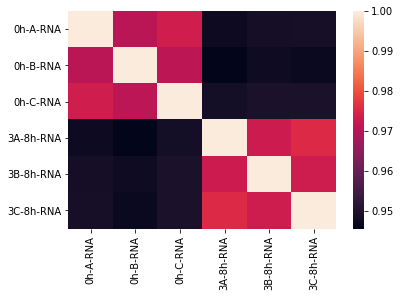

In [109]:
sns.heatmap(JQ1.T.corr(), 
            xticklabels=JQ1.index.values,
            yticklabels=JQ1.index.values)

In [113]:
MS2_JQ1 = MS2_JQ1[MS2_JQ1.columns.values[:-6]]

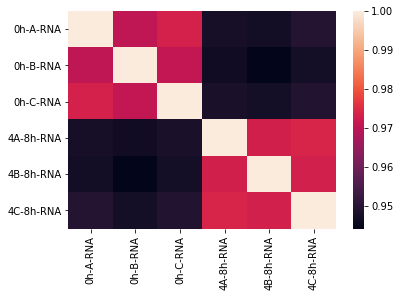

In [114]:
sns.heatmap(MS2_JQ1.T.corr(),
            xticklabels=MS2_JQ1.index.values,
            yticklabels=MS2_JQ1.index.values)

In [115]:
ctf=pd.read_csv('CTF.csv',header=None)[0].values.tolist()
ctf

['MYC',
 'MYB',
 'SPI1',
 'RUNX1',
 'GSE1',
 'IRF2BP2',
 'FLI1',
 'ELF2',
 'ZEB2',
 'IKAROS',
 'GFI1',
 'LMO2',
 'CEBPA',
 'MEF2D',
 'MEF2C',
 'IRF8',
 'MEIS1',
 'RUNX2',
 'ETV6',
 'LDB1',
 'RUNX2',
 'SP1',
 'ZMYND8']

In [117]:
genenames, notparsed = convertGenes(counts.columns.values)

6 could not be parsed... we don't have all genes already


In [118]:
genenames = np.array(genenames)

In [119]:
np.argwhere(genenames[mostvargenesA] == ctf[5])

array([[2171]])

In [120]:
ctf[1] in genenames

True

In [122]:
genenames=genenames.tolist()

In [123]:
ctfpos = [genenames.index(val) for val in ctf if val in genenames]
notctfpos = [i for i, val in enumerate(genenames) if val not in ctf]

# Let's look at how they change accross time

how core transcription factors change accross time when the cell is with MS2 Condition

first line is avg count of CTF and line 2 is avg count of protein coding genes 

In [126]:
MS2repA.values.mean(1)

array([8.37308005, 8.35047837, 8.24034235, 8.26993624, 8.04704543,
       8.04293133])

In [180]:
ctf_var = MS2repA.values[ctfpos].mean(0)
mean_var = MS2repA.values.mean(0)

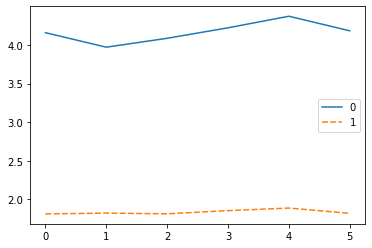

In [181]:
sns.lineplot(data=[ctf_var, mean_var])

In [65]:
MS2repB.values.mean(0)

array([408.58532408, 445.09849963, 462.6499118 , 455.72562259,
       411.87492433, 504.58639286])

In [66]:
ctf_var = MS2repB.values[ctfpos].mean(0)
mean_var = MS2repB.values.mean(0)

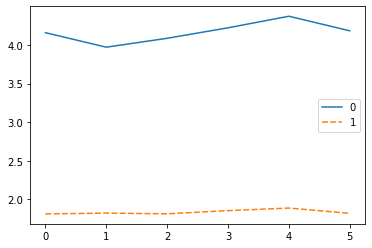

In [182]:
sns.lineplot(data=[ctf_var, mean_var])

# we can verify per tf 

but we expect to find the same results

In [185]:
MS2repC.values.mean(0)

array([1.8327533 , 1.83012022, 1.76705103, 1.83735847, 1.84672774,
       1.83385807])

In [186]:
ctf_var = MS2repC.values[ctfpos]
mean_var = MS2repC.values[notctfpos].mean(0)

In [187]:
data = np.vstack((ctf_var, mean_var))
data

array([[6.3338301 , 5.48736624, 5.24854922, 5.23281838, 5.71508503,
        6.13897897],
       [5.02519545, 4.38052551, 4.33729074, 4.63792775, 4.78256295,
        4.84379331],
       [5.93824835, 5.87543622, 5.77200171, 5.76907071, 5.67771225,
        5.78302486],
       [4.56684507, 4.42268862, 4.50623344, 4.49446206, 4.49880917,
        4.64159854],
       [4.09167433, 4.0111441 , 3.31527632, 3.62354061, 3.94584455,
        4.24749474],
       [5.34185567, 5.20235698, 5.30573975, 5.51769383, 5.45903217,
        5.45361025],
       [3.5295906 , 3.32359614, 3.1565748 , 3.39618484, 3.66227877,
        3.73361379],
       [2.97705901, 2.93863268, 2.89591194, 3.00716665, 2.91560623,
        2.88200351],
       [4.7029319 , 4.79818437, 4.95646066, 4.86275381, 4.61798769,
        4.55702981],
       [4.95229972, 4.54870565, 4.57954464, 4.85491672, 4.90823336,
        5.01800805],
       [4.64323639, 4.36729364, 4.46866294, 4.65662347, 4.98975208,
        5.08115589],
       [5.97217979, 5

In [188]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','a','t','z','0','z')

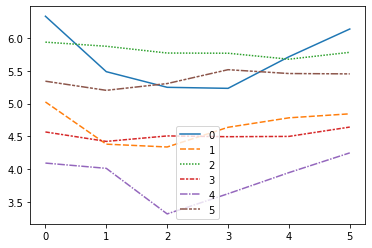

In [221]:
sns.lineplot(data=data[:6].T)

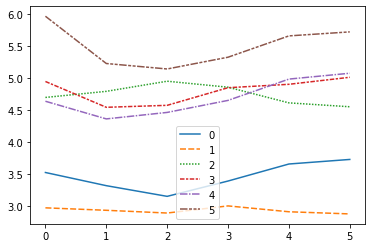

In [190]:
sns.lineplot(data=data[6:12].T)

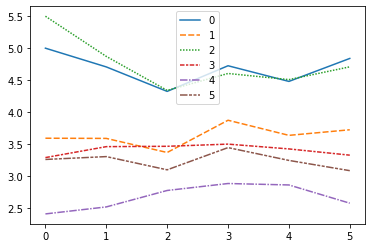

In [191]:
sns.lineplot(data=data[12:18].T)